In [1]:
import scipy.io
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.container import BarContainer
import pandas as pd
from matplotlib import rc

# for the figure font size
sns.set_context('poster')


In [2]:
# load data
results = scipy.io.loadmat('results_X_Y.mat')['all_results']

In [3]:
# create dataframe
y_het_var = np.squeeze(results['y_het_var'][0,0])
y_hom_var = np.squeeze(results['y_hom_var'][0,0])
x_het_var = np.squeeze(results['x_het_var'][0,0])
x_hom_var = np.squeeze(results['x_hom_var'][0,0])
het_mse = np.squeeze(results['het_mse'][0,0])
hom_mse = np.squeeze(results['hom_mse'][0,0])

# use log-scale for better visualization
var_y_ratio = np.log2(y_het_var/y_hom_var)
var_x_ratio = np.log2(x_het_var/x_hom_var)
mse_ratio = np.log2(het_mse/hom_mse)

df = pd.DataFrame({'var_y_ratio (log)': var_y_ratio, 'var_x_ratio (log)': var_x_ratio, 'mse_ratio (log)': mse_ratio})

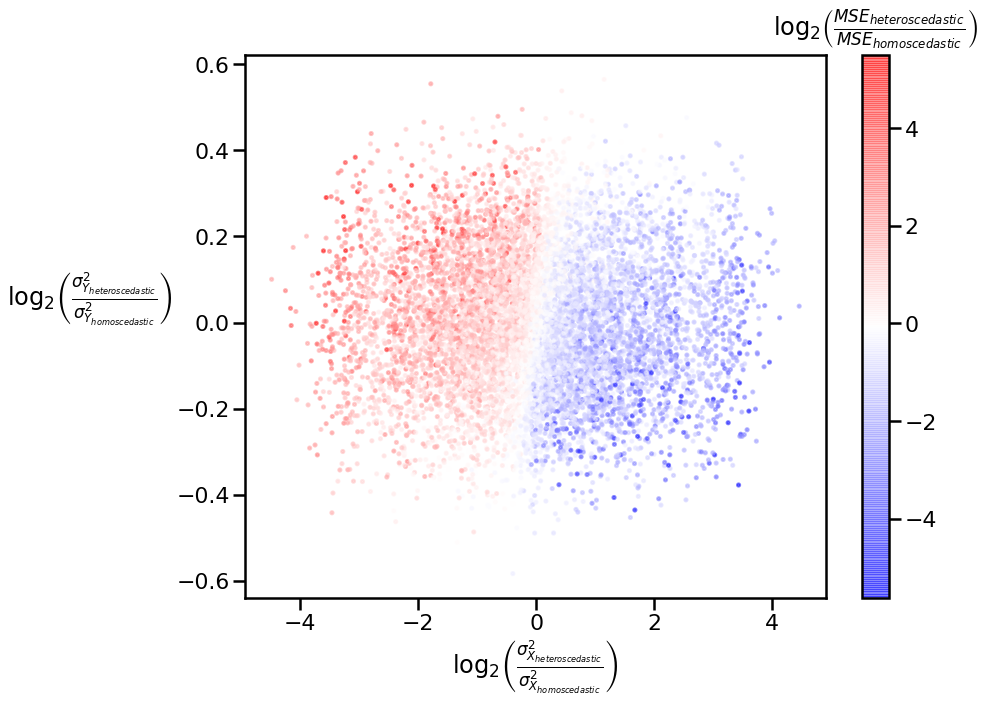

In [4]:
# x var ratio vs y var ratio
fig1, ax1 = plt.subplots(figsize=(13,10))
plot1 = ax1.scatter(var_x_ratio,var_y_ratio,c=mse_ratio,s=10,alpha=0.5,cmap='bwr')
ax1.set_xlabel(r'$\log_2\left(\frac{\sigma^2_{X_{heteroscedastic}}}{\sigma^2_{X_{homoscedastic}}}\right)$')
ax1.set_ylabel(r'$\log_2\left(\frac{\sigma^2_{Y_{heteroscedastic}}}{\sigma^2_{Y_{homoscedastic}}}\right)$')
ax1.yaxis.label.set(rotation='horizontal', ha='right')
cbar1 = fig1.colorbar(plot1)
cbar1.ax.set_title(r'$\log_2\left(\frac{MSE_{heteroscedastic}}{MSE_{homoscedastic}}\right)$',y=1.025)
plt.show()
fig1.savefig('simulation_varx_vs_vary.png', dpi=400, bbox_inches='tight')

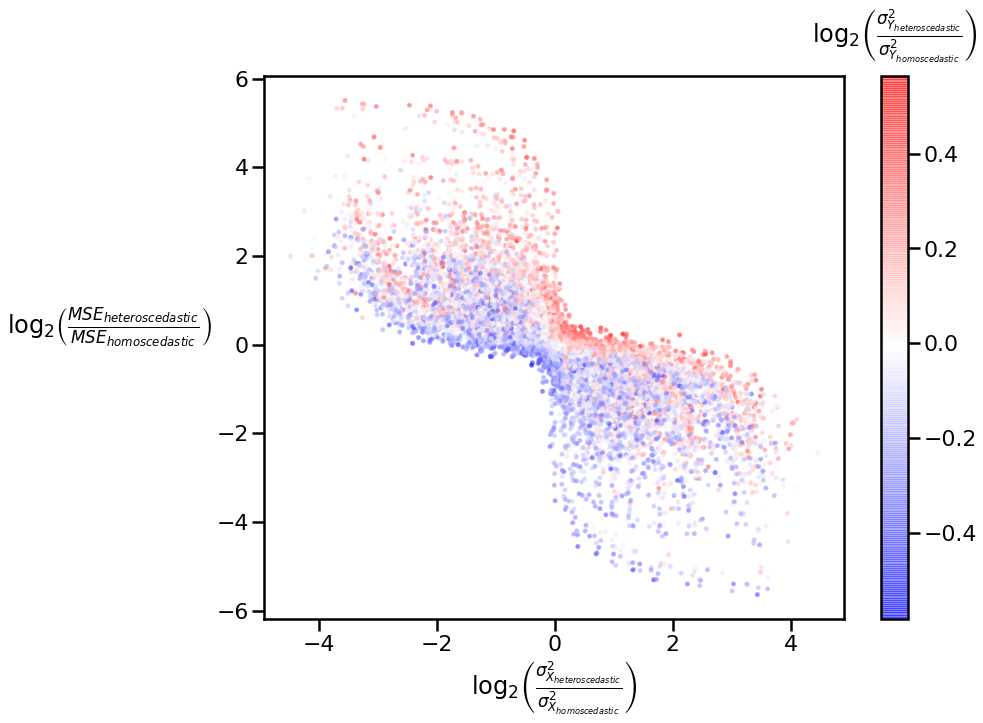

In [5]:
# # x var ratio vs mse ratio
# fig2, ax2 = plt.subplots(figsize=(13,10))
# plot2 = ax2.scatter(var_x_ratio,mse_ratio,c=var_y_ratio,s=10,alpha=0.5,cmap='bwr')
# ax2.set_xlabel(r'$\log_2\left(\frac{\sigma^2_{X_{heteroscedastic}}}{\sigma^2_{X_{homoscedastic}}}\right)$')
# ax2.set_ylabel(r'$\log_2\left(\frac{MSE_{heteroscedastic}}{MSE_{homoscedastic}}\right)$')
# ax2.yaxis.label.set(rotation='horizontal', ha='right')
# cbar2 = fig2.colorbar(plot2)
# cbar2.ax.set_title(r'$\log_2\left(\frac{\sigma^2_{Y_{heteroscedastic}}}{\sigma^2_{Y_{homoscedastic}}}\right)$',y=1.05)
# plt.show()
# fig2.savefig('simulation_varx_vs_mse.png', dpi=400, bbox_inches='tight')

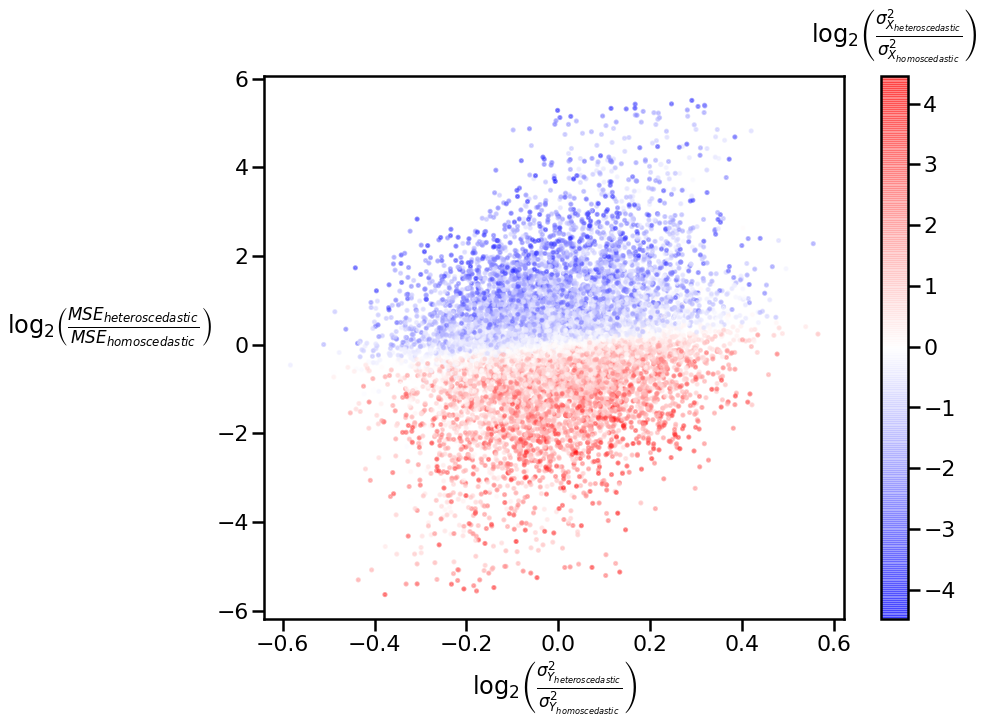

In [6]:
# # y var ratio vs mse ratio
# fig3, ax3 = plt.subplots(figsize=(13,10))
# plot3 = ax3.scatter(var_y_ratio,mse_ratio,c=var_x_ratio,s=10,alpha=0.5,cmap='bwr')
# ax3.set_xlabel(r'$\log_2\left(\frac{\sigma^2_{Y_{heteroscedastic}}}{\sigma^2_{Y_{homoscedastic}}}\right)$')
# ax3.set_ylabel(r'$\log_2\left(\frac{MSE_{heteroscedastic}}{MSE_{homoscedastic}}\right)$')
# ax3.yaxis.label.set(rotation='horizontal', ha='right')
# cbar3 = fig3.colorbar(plot3)
# cbar3.ax.set_title(r'$\log_2\left(\frac{\sigma^2_{X_{heteroscedastic}}}{\sigma^2_{X_{homoscedastic}}}\right)$',y=1.05)
# plt.show()
# fig3.savefig('simulation_vary_vs_mse.png', dpi=400, bbox_inches='tight')